In [1]:
#Creators -
#Shreejit Gajanan Deshmukh
#Venkata Advaith Sai Kandiraju
#PRCV Spring 2023' Assignment 5 - Deep learning

In [2]:
#Summary -
#This program does analysis on our learned filters from CNN
#We also apply the filters on our digit example to see how it
#affects our image.

In [3]:
#Importing libraries
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
import torchvision.transforms as T
import cv2

In [4]:
#Hyperparameters
learning_rate = 0.01
momentum = 0.5
batch_size_train = 64

In [5]:
#loading training set for later use
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

#loading the first image (number) for applying extracted weight filter
batches = enumerate(train_loader)
batch_idx, (batch_data, batch_targets) = next(batches)

In [6]:
#Building the network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [7]:
#Initializing the neural network and the optimizer 
trained_NN = Net()
trained_optimizer = optim.SGD(trained_NN.parameters(), lr=learning_rate,
                      momentum=momentum)

In [8]:
#Loading our trained network and optimizer
network_state_dict = torch.load('results/model.pth')
trained_NN.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('results/optimizer.pth')
trained_optimizer.load_state_dict(optimizer_state_dict)

In [11]:
#Checking our loaded neural network
summary(trained_NN)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            260
├─Conv2d: 1-2                            5,020
├─Dropout2d: 1-3                         --
├─Linear: 1-4                            16,050
├─Linear: 1-5                            510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            260
├─Conv2d: 1-2                            5,020
├─Dropout2d: 1-3                         --
├─Linear: 1-4                            16,050
├─Linear: 1-5                            510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0

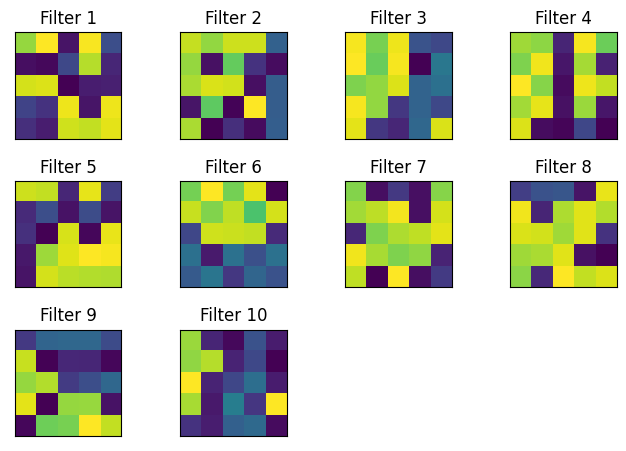

In [9]:
#Plotting the trained filters to visualize weights in each row and column of our trained filters
fig = plt.figure()
for i in range(10):
    plt.subplot(3,4,i + 1)
    plt.tight_layout()
    transform = T.ToPILImage()
    img = transform(trained_NN.conv1.weight[i,0])
    plt.imshow(img, interpolation = "none")
    plt.title("Filter {}".format(i + 1))
    plt.xticks([])
    plt.yticks([])

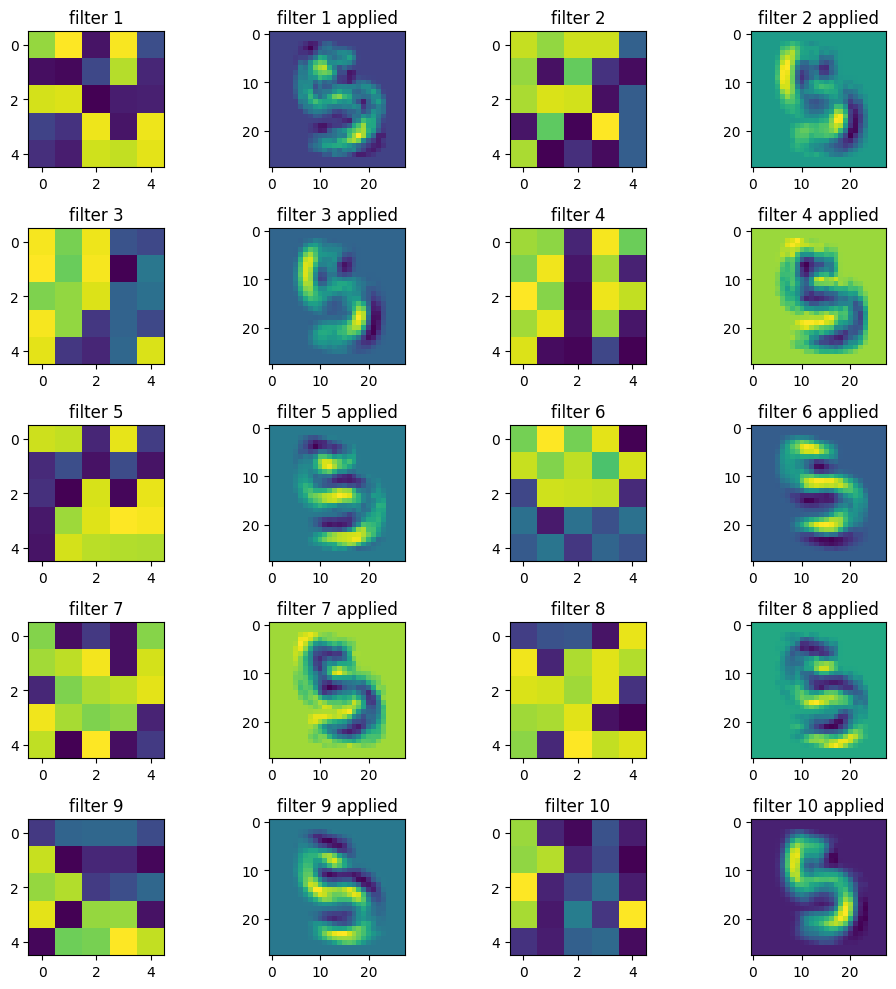

In [10]:
#Visualizing the filters and it applied on the example digit image to see its impact.
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))
row, col = 0, 0
with torch.no_grad():
    for i in range(10):
        filt = trained_NN.conv1.weight[i,0].numpy()
        inp = batch_data[0][0].numpy()
        transform = T.ToPILImage()
        img = transform(trained_NN.conv1.weight[i,0])
        out = cv2.filter2D(inp, ddepth = -1, kernel = filt)
        ax = axes[row, col]
        ax.imshow(img, interpolation = 'none')
        ax.set_title('filter {}'.format(i + 1))
        col += 1
        ax = axes[row, col]
        ax.imshow(out, interpolation = 'none')
        ax.set_title('filter {} applied'.format(i + 1))
        col += 1
        if(col == 4):
            col = 0
            row += 1
        plt.tight_layout()